# Lab Assignment 3

## Nancy Mae Eagles, s1708813

## Task 1
**(a)** The following code is my implementation of the `interpolate` and `show_interpolation` functions from Lab 3.

In [4]:
def interpolate(pts):
    n = len(pts)                            # number of points
    xs = [pt[0] for pt in pts]              # extracting x coordinates
    ys = [pt[1] for pt in pts]              # extracting y coordinates
    V = matrix.vandermonde(xs)              # coefficient (vandermonde) matrix for system
    a = V.solve_right(vector(ys))           # solve system of equations for coefficients
    P = add([a[i]*x^i for i in range(0,n)]) # construct polynomial using coefficients
    return P

def show_interpolation(pts):
    Poly = interpolate(pts)                 # find polynomial given points 
    print Poly
    xs = [pt[0] for pt in pts]
    # Plot polynomial for appropriate interval, and also original points in red
    return plot(Poly,min(xs)-1,max(xs)+1, title = "Interpolated Polynomial", axes_labels = ["$x$","$P(x)$"])+list_plot(pts, color = 'red')


**(b)** The following code uses a list comprehension to produce a list quintic_points consisting of points of the form $(k,k^5)$ for $1\leq k \leq 4$.

65*x^3 - 300*x^2 + 476*x - 240


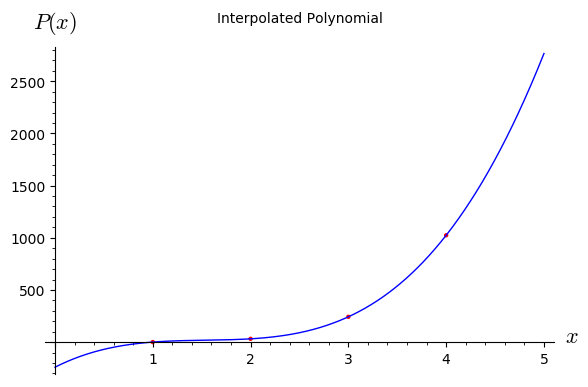

In [5]:
quintic_points = [[k,k^5] for k in [1..4]]
show_interpolation(quintic_points) # plot interpolated polynomial for given points

**(c)** We can implement the same function using the same points $(k,k^5)$, this time for $1 \leq k \leq 6$. As we increase the maximum value of $k$, we see that the interpolation becomes a better approximation for the function $f(x) = x^5$. This is due to the fact that more points are used to determine the second polynomial than the first. Notably this can be seen by the fact that, for $1\leq k \leq 6$, the curve seemingly has a root approximately at $x=0$, whereas for $1 \leq k \leq 4$, there is an apparent root at approximately $x=1$.

x^5


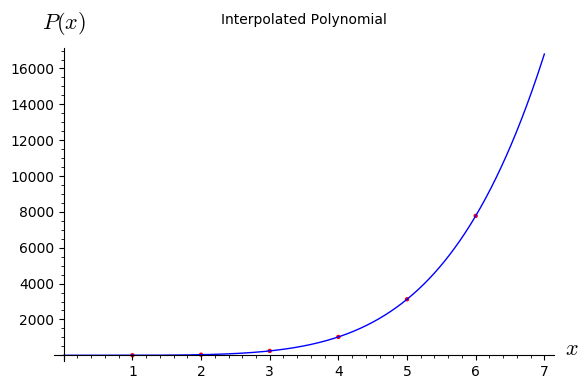

In [6]:
quintic_points2 = [[k,k^5] for k in [1..6]]
show_interpolation(quintic_points2) # plot interpolated polynomial for given points

## Task 2

**(a)** In Lab 3 we created the `ourdet2` function, which determines the determinant of an input matrix $A$. The function is based off of the `ourdet` function given in Lab 3. The function still uses the "cofactor expansion along the first row" method:
$$\det A = \sum_{j=1}^n (-1)^{1+j}a_{1j}\det A_{1j}$$ where $A_{1j}$ is the matrix obtained by deleting row 1 and column $j$ of $A$.
However, it is faster than `ourdet` due to the fact that it considers the possibility that an element $A_{1j}$ may be equal to 0, in which case the term added in the sum will be zero. Comparatively, `ourdet` does not distinguish different values of $A_{1j}$, and so runs calculations unnecessarily when $A_{1j}=0$. 

In [7]:
def ourdet2(A):
    m, n = A.nrows(), A.ncols() # determine size of matrix 
    if m<>n:
        return("Error: matrix must be square")
    elif n == 1:
        return(A[0,0])
    else:
        det = 0
        for j in range(n):
            if A[0,j]==0:   # if the jth entry in the first row is 0...
                det = det   # no change to the determinant 
            elif A[0,j]!=0: # if jth entry is not 0...
                # ... run through calculation for cofactor
                det = det + (-1)^j * A[0, j] * ourdet2(A[1:,[i for i in [0..n-1] if i != j]]) 
    return(det)

**(b)** The following code produces a plot comparing the run time of our new function, `ourdet2`, for $n\times n$ matrices of different densities. The blue points are the run times of matrices with density $1$, for $1\leq n\leq 8$, and the red points are the run times for matrices with density $0.4$, for $1 \leq n \leq 12$. We can see a significant difference between the two. For matrices with lower density of nonzero terms, the function runs much faster. 

In [8]:
import time

def timer(A):                 # define a function that will time ourdet2 for a matrix A
    st = time.time()          # record initial time
    ourdet2(A)                # run function
    return (time.time() - st) # output change in time

# create data arrays of runtimes for different n and densities
runtimes1 = [(n, timer(random_matrix(ZZ,n,n, density = 1))) for n in [1..8]]
runtimes2 = [(n,timer(random_matrix(ZZ,n,n, density = 0.4))) for n in [1..12]]

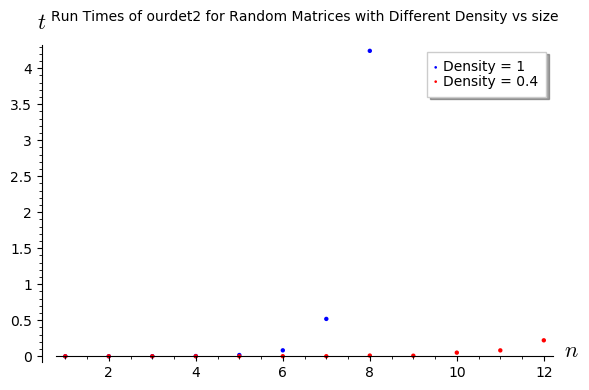

In [9]:
# plot and overlay graphs for each data array, coloring and labelling the different data sets 
G = list_plot(runtimes1, title = "Run Times of ourdet2 for Random Matrices with Different Density vs size", legend_label = "Density = 1")
G+= list_plot(runtimes2, legend_label = "Density = 0.4", color = "red", axes_labels = ["$n$","$t$"])
G.show() 